<a href="https://colab.research.google.com/github/Harshithaukp/math-visualization/blob/main/math_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# My Interactive Mathematical Visualization Platform
# Installing everything I need for this awesome project

print("Setting up my math visualization project...")
!pip install ipywidgets sympy plotly seaborn scipy statsmodels

from google.colab import output
output.enable_custom_widget_manager()

print("All set! Let's build something amazing 🚀")


Setting up my math visualization project...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00
All set! Let's build something amazing 🚀


In [7]:
# Interactive Mathematical Visualization Platform


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')  # keeps output clean

try:
    import ipywidgets as widgets
    from IPython.display import display, HTML, clear_output
    import sympy as sp
    print("Great! Interactive widgets are ready")
except ImportError:
    print("Running without widgets - still works fine")
    import sympy as sp

# My preferred plotting settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

class MathVisualizationPlatform:
    """
    My custom mathematical visualization platform
    Features I built: fractals, function plotting, stats analysis
    Perfect for demonstrations and presentations!
    """

    def __init__(self):
        # My custom color schemes - including my brand colors!
        self.my_colors = {
            'viridis': plt.cm.viridis,
            'plasma': plt.cm.plasma,
            'cool': plt.cm.cool,
            'hot': plt.cm.hot,
            'rainbow': plt.cm.rainbow,
            'my_brand': self.create_my_colormap()  # personal touch
        }
        print(" My Math Platform is ready!")
        print("Built by me for: Fractals | Functions | Statistics")

    def create_my_colormap(self):
        # My personal brand colors - looks professional!
        brand_colors = ['#EE4540', '#C72C41', '#801336', '#510A32', '#2D142C']
        return LinearSegmentedColormap.from_list('personal', brand_colors)

    def create_mandelbrot(self, width=800, height=600, iterations=100,
                         x_start=-2.5, x_end=1.0, y_start=-1.25, y_end=1.25,
                         color_scheme='viridis'):
        """
        My implementation of the Mandelbrot fractal
        This took me a while to get right, but the results are stunning!
        """
        print(f" Creating Mandelbrot fractal - {width}x{height} resolution")
        print(f"Using {iterations} iterations for detail")

        # Setting up the complex plane - learned this from studying complex analysis
        x_values = np.linspace(x_start, x_end, width)
        y_values = np.linspace(y_start, y_end, height)
        X, Y = np.meshgrid(x_values, y_values)
        complex_plane = X + 1j*Y

        # The actual Mandelbrot algorithm - this is where the magic happens
        z = np.zeros_like(complex_plane)
        fractal_data = np.zeros(complex_plane.shape)

        # Iterating through each point - vectorized for speed
        for i in range(iterations):
            mask = np.abs(z) <= 2  # points that haven't escaped yet
            z[mask] = z[mask]**2 + complex_plane[mask]  # the famous formula!
            fractal_data[mask] = i

        # Creating the visualization - this part makes it beautiful
        fig, ax = plt.subplots(figsize=(15, 12))

        # Choosing colors
        if color_scheme in self.my_colors:
            colormap = self.my_colors[color_scheme]
        else:
            colormap = plt.cm.get_cmap(color_scheme)

        # The actual plot
        fractal_plot = ax.imshow(fractal_data, extent=[x_start, x_end, y_start, y_end],
                               cmap=colormap, origin='lower', interpolation='bilinear')

        # Making it look professional
        ax.set_title(f'Mandelbrot Set Fractal\n{width}×{height} | {iterations} iterations',
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Real Part', fontsize=12)
        ax.set_ylabel('Imaginary Part', fontsize=12)

        # Adding a colorbar for reference
        cbar = plt.colorbar(fractal_plot, ax=ax, shrink=0.8)
        cbar.set_label('Escape Iterations', fontsize=12)

        plt.tight_layout()
        plt.show()

        print(" Fractal complete! Looks amazing right?")
        return fractal_data

    def create_julia_set(self, c_real=-0.7, c_imaginary=0.27015,
                        width=800, height=600, iterations=100,
                        zoom_level=2.0, colors='plasma'):
        """
        Julia set generator - these create the most beautiful patterns!
        The c parameter determines the shape - I love experimenting with different values
        """
        print(f" Generating Julia Set with c = {c_real:.3f} + {c_imaginary:.3f}i")

        # Setting up coordinates
        x_range = np.linspace(-zoom_level, zoom_level, width)
        y_range = np.linspace(-zoom_level, zoom_level, height)
        X, Y = np.meshgrid(x_range, y_range)
        z_initial = X + 1j*Y

        # The complex constant - this is what makes each Julia set unique
        c = complex(c_real, c_imaginary)
        escape_data = np.zeros(z_initial.shape)

        # Julia set iteration - different from Mandelbrot but just as beautiful
        for i in range(iterations):
            mask = np.abs(z_initial) <= 2
            z_initial[mask] = z_initial[mask]**2 + c
            escape_data[mask] = i

        # Visualization time!
        fig, ax = plt.subplots(figsize=(15, 12))

        colormap = self.my_colors.get(colors, plt.cm.get_cmap(colors))

        julia_plot = ax.imshow(escape_data, extent=[-zoom_level, zoom_level, -zoom_level, zoom_level],
                             cmap=colormap, origin='lower', interpolation='bilinear')

        ax.set_title(f'Julia Set Fractal\nc = {c_real:.3f} + {c_imaginary:.3f}i | {iterations} iterations',
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_xlabel('Real Part', fontsize=12)
        ax.set_ylabel('Imaginary Part', fontsize=12)

        cbar = plt.colorbar(julia_plot, ax=ax, shrink=0.8)
        cbar.set_label('Escape Time', fontsize=12)

        plt.tight_layout()
        plt.show()

        print(" Another masterpiece created!")
        return escape_data

    def sierpinski_triangle(self, points=50000, colors='cool'):
        """
        Sierpinski Triangle using the chaos game method
        One of my favorite algorithms - so simple yet creates such complex patterns!
        """
        print(f" Building Sierpinski Triangle with {points:,} points")
        print("Using the chaos game method - it's like magic!")

        # The three vertices of our triangle
        triangle_points = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])

        # Starting point - anywhere inside works
        current_point = np.array([0.5, 0.25])

        # Lists to store our fractal points
        x_coords = []
        y_coords = []
        point_colors = []

        # The chaos game algorithm
        for step in range(points):
            # Pick a random vertex
            random_vertex = triangle_points[np.random.randint(3)]

            # Move halfway towards it
            current_point = (current_point + random_vertex) / 2

            # Store the point
            x_coords.append(current_point[0])
            y_coords.append(current_point[1])
            point_colors.append(step)  # for color gradient

        # Time to visualize this beauty
        fig, ax = plt.subplots(figsize=(12, 12))

        colormap = self.my_colors.get(colors, plt.cm.get_cmap(colors))

        scatter = ax.scatter(x_coords, y_coords, c=point_colors,
                           cmap=colormap, s=0.1, alpha=0.8)

        ax.set_title(f'Sierpinski Triangle\n{points:,} points via Chaos Game Method',
                    fontsize=16, fontweight='bold', pad=20)
        ax.set_aspect('equal')
        ax.axis('off')  # looks cleaner without axes

        cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
        cbar.set_label('Generation Order', fontsize=12)

        plt.tight_layout()
        plt.show()

        print(" Fractal complete! The patterns that emerge are incredible")
        return np.array([x_coords, y_coords]).T

    def plot_math_function(self, function='sin(x)', x_min=-10, x_max=10,
                          points=1000, plot_style='line', line_color='blue'):
        """
        My function plotter - can handle any mathematical expression!
        I use SymPy for parsing - it's incredibly powerful
        """
        print(f" Plotting function: f(x) = {function}")

        try:
            # Using SymPy to parse the mathematical expression
            x = sp.Symbol('x')
            expression = sp.sympify(function)
            func = sp.lambdify(x, expression, 'numpy')

            # Generate the data points
            x_data = np.linspace(x_min, x_max, points)

            # Handle potential mathematical errors gracefully
            with np.errstate(invalid='ignore', divide='ignore'):
                y_data = func(x_data)

            # Creating the plot
            fig, ax = plt.subplots(figsize=(14, 8))

            # Different plot styles I implemented
            if plot_style == 'line':
                ax.plot(x_data, y_data, color=line_color, linewidth=2,
                       label=f'f(x) = {function}')
            elif plot_style == 'scatter':
                ax.scatter(x_data, y_data, color=line_color, alpha=0.6, s=1)
            elif plot_style == 'filled':
                ax.fill_between(x_data, y_data, alpha=0.5, color=line_color)

            # Making it look professional
            ax.set_title(f'Function Visualization: f(x) = {function}',
                        fontsize=16, fontweight='bold')
            ax.set_xlabel('x', fontsize=12)
            ax.set_ylabel('f(x)', fontsize=12)
            ax.grid(True, alpha=0.3)

            # Adding reference lines
            ax.axhline(y=0, color='k', linewidth=0.5, alpha=0.7)
            ax.axvline(x=0, color='k', linewidth=0.5, alpha=0.7)

            if plot_style == 'line':
                ax.legend()

            plt.tight_layout()
            plt.show()

            print(" Function plotted successfully!")
            return x_data, y_data

        except Exception as error:
            print(f" Oops, couldn't plot that function: {error}")
            print(" Try functions like: sin(x), cos(x), x**2, exp(x), log(abs(x))")
            return None, None

    def plot_3d_surface(self, function='x**2 + y**2', x_min=-3, x_max=3,
                       y_min=-3, y_max=3, resolution=50):
        """
        3D surface plotter - this creates some stunning visualizations!
        Perfect for showing functions of two variables
        """
        print(f" Creating 3D surface: f(x,y) = {function}")

        try:
            # Parse the 3D function
            x, y = sp.symbols('x y')
            expression = sp.sympify(function)
            func_3d = sp.lambdify([x, y], expression, 'numpy')

            # Create the mesh grid
            x_vals = np.linspace(x_min, x_max, resolution)
            y_vals = np.linspace(y_min, y_max, resolution)
            X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)

            # Calculate Z values
            with np.errstate(invalid='ignore', divide='ignore'):
                Z_mesh = func_3d(X_mesh, Y_mesh)

            # Create the 3D plot
            fig = plt.figure(figsize=(14, 10))
            ax = fig.add_subplot(111, projection='3d')

            # Surface plot with nice colors
            surface = ax.plot_surface(X_mesh, Y_mesh, Z_mesh, cmap='viridis',
                                    alpha=0.8, linewidth=0, antialiased=True)

            ax.set_title(f'3D Surface: f(x,y) = {function}',
                        fontsize=16, fontweight='bold', pad=20)
            ax.set_xlabel('x', fontsize=12)
            ax.set_ylabel('y', fontsize=12)
            ax.set_zlabel('f(x,y)', fontsize=12)

            # Add colorbar
            fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

            plt.tight_layout()
            plt.show()

            print(" 3D surface created! Looks incredible!")
            return X_mesh, Y_mesh, Z_mesh

        except Exception as error:
            print(f" Couldn't create 3D surface: {error}")
            print(" Try: x**2 + y**2, sin(x)*cos(y), exp(-(x**2 + y**2))")
            return None, None, None

    def analyze_statistics(self, distribution='normal', param_1=0, param_2=1,
                          sample_count=10000, run_tests=True):
        """
        My statistical analysis tool - comprehensive stats in one function!
        I spent a lot of time making sure this covers everything important
        """
        print(f" Statistical Analysis: {distribution.title()} Distribution")
        print(f"Parameters: {param_1}, {param_2} | Sample Size: {sample_count:,}")

        # Generate data based on distribution type
        if distribution.lower() == 'normal':
            data = np.random.normal(param_1, param_2, sample_count)
            title = f'Normal Distribution (μ={param_1}, σ={param_2})'
        elif distribution.lower() == 'uniform':
            data = np.random.uniform(param_1, param_2, sample_count)
            title = f'Uniform Distribution (a={param_1}, b={param_2})'
        elif distribution.lower() == 'exponential':
            data = np.random.exponential(param_1, sample_count)
            title = f'Exponential Distribution (λ={1/param_1:.3f})'
        elif distribution.lower() == 'gamma':
            data = np.random.gamma(param_1, param_2, sample_count)
            title = f'Gamma Distribution (α={param_1}, β={param_2})'
        else:
            print(f" Don't know that distribution: {distribution}")
            return None

        # Calculate all the important statistics
        my_stats = {
            'Sample Size': sample_count,
            'Mean': np.mean(data),
            'Standard Deviation': np.std(data),
            'Variance': np.var(data),
            'Median': np.median(data),
            'Mode (approx)': stats.mode(np.round(data, 2), keepdims=True)[0][0],
            'Skewness': stats.skew(data),
            'Kurtosis': stats.kurtosis(data),
            'Minimum': np.min(data),
            'Maximum': np.max(data),
            'Range': np.max(data) - np.min(data),
            'IQR': np.percentile(data, 75) - np.percentile(data, 25),
            '5th Percentile': np.percentile(data, 5),
            '95th Percentile': np.percentile(data, 95)
        }

        # Create comprehensive visualization - this is my favorite part!
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(title, fontsize=16, fontweight='bold', y=0.98)

        # 1. Histogram with density curve
        axes[0,0].hist(data, bins=50, density=True, alpha=0.7, color='skyblue',
                      edgecolor='black', linewidth=0.5)

        # Add KDE (Kernel Density Estimation) - learned this in stats class
        kde_x = np.linspace(np.min(data), np.max(data), 200)
        kde = stats.gaussian_kde(data)
        axes[0,0].plot(kde_x, kde(kde_x), 'r-', linewidth=2, label='KDE')

        axes[0,0].set_title('Histogram + KDE', fontweight='bold')
        axes[0,0].set_xlabel('Value')
        axes[0,0].set_ylabel('Density')
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)

        # 2. Box plot - great for seeing outliers
        box = axes[0,1].boxplot(data, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightgreen', alpha=0.7),
                               medianprops=dict(color='red', linewidth=2))
        axes[0,1].set_title('Box Plot', fontweight='bold')
        axes[0,1].set_ylabel('Value')
        axes[0,1].grid(True, alpha=0.3)

        # 3. Q-Q plot for normality check
        stats.probplot(data, dist="norm", plot=axes[0,2])
        axes[0,2].set_title('Q-Q Plot vs Normal', fontweight='bold')
        axes[0,2].grid(True, alpha=0.3)

        # 4. Empirical CDF
        sorted_data = np.sort(data)
        cumulative_prob = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
        axes[1,0].plot(sorted_data, cumulative_prob, 'b-', linewidth=2)
        axes[1,0].set_title('Cumulative Distribution', fontweight='bold')
        axes[1,0].set_xlabel('Value')
        axes[1,0].set_ylabel('Cumulative Probability')
        axes[1,0].grid(True, alpha=0.3)

        # 5. Violin plot - combines box plot with KDE
        violin = axes[1,1].violinplot([data], positions=[1], showmeans=True,
                                     showmedians=True, showextrema=True)
        for part in violin['bodies']:
            part.set_facecolor('lightcoral')
            part.set_alpha(0.7)
        axes[1,1].set_title('Violin Plot', fontweight='bold')
        axes[1,1].set_ylabel('Value')
        axes[1,1].set_xticks([1])
        axes[1,1].set_xticklabels([distribution.title()])
        axes[1,1].grid(True, alpha=0.3)

        # 6. Statistics summary table
        axes[1,2].axis('off')
        stats_text = "Statistical Summary\n" + "="*25 + "\n"
        for key, value in my_stats.items():
            if isinstance(value, (int, np.integer)):
                stats_text += f"{key:<20}: {value:,}\n"
            else:
                stats_text += f"{key:<20}: {value:.4f}\n"

        axes[1,2].text(0.05, 0.95, stats_text, transform=axes[1,2].transAxes,
                      fontsize=10, verticalalignment='top', fontfamily='monospace',
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.8))

        plt.tight_layout()
        plt.show()

        # Run statistical tests if requested
        if run_tests:
            self.run_statistical_tests(data, distribution)

        return data, my_stats

    def run_statistical_tests(self, data, dist_type):
        """Statistical hypothesis testing - this is where I show my stats knowledge!"""
        print("\n" + "="*60)
        print("HYPOTHESIS TESTING RESULTS")
        print("="*60)

        # Normality tests - super important in statistics
        print("\n TESTING FOR NORMALITY:")
        print("-" * 30)

        # Shapiro-Wilk test (works best with smaller samples)
        if len(data) <= 5000:
            shapiro_stat, shapiro_p = stats.shapiro(data)
            print(f"Shapiro-Wilk Test:")
            print(f"  Test Statistic: {shapiro_stat:.6f}")
            print(f"  P-value: {shapiro_p:.6e}")
            print(f"  Conclusion: {'Data appears normal' if shapiro_p > 0.05 else 'Data is not normal'} (α=0.05)")

        # Kolmogorov-Smirnov test
        ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
        print(f"\nKolmogorov-Smirnov Test:")
        print(f"  Test Statistic: {ks_stat:.6f}")
        print(f"  P-value: {ks_p:.6e}")
        print(f"  Conclusion: {'Follows normal distribution' if ks_p > 0.05 else 'Does not follow normal distribution'}")

        # Anderson-Darling test - more powerful than KS test
        ad_stat, ad_critical, ad_significance = stats.anderson(data, dist='norm')
        print(f"\nAnderson-Darling Test:")
        print(f"  Test Statistic: {ad_stat:.6f}")
        print(f"  Critical Values: {ad_critical}")
        print(f"  Significance Levels: {ad_significance}%")

        # One-sample t-test
        print("\n ONE-SAMPLE TESTS:")
        print("-" * 30)

        test_mean = 0 if dist_type == 'normal' else np.mean(data)
        t_stat, t_p = stats.ttest_1samp(data, test_mean)
        print(f"One-Sample T-Test (testing if μ = {test_mean}):")
        print(f"  T-statistic: {t_stat:.6f}")
        print(f"  P-value: {t_p:.6e}")
        print(f"  Decision: {'Fail to reject H₀' if t_p > 0.05 else 'Reject H₀'} (α=0.05)")

        print("\n" + "="*60)

    def create_full_demo(self):
        """
        My comprehensive demo - showcases everything I've built!
        This is what I show in presentations and interviews
        """
        print(" Creating My Complete Demo Dashboard")
        print("Showcasing all features I developed...")
        print("="*60)

        # Setting up the mega-plot
        fig = plt.figure(figsize=(20, 24))
        gs = fig.add_gridspec(6, 3, height_ratios=[1, 1, 1, 1, 1, 0.5],
                             hspace=0.3, wspace=0.2)

        # Row 1: My three favorite fractals
        # Mandelbrot
        ax1 = fig.add_subplot(gs[0, 0])
        mandelbrot_data = self._quick_mandelbrot(400, 300, 50)
        ax1.imshow(mandelbrot_data, cmap='hot', extent=[-2, 1, -1.5, 1.5])
        ax1.set_title('Mandelbrot Set', fontweight='bold')
        ax1.set_xlabel('Real')
        ax1.set_ylabel('Imaginary')

        # Julia Set
        ax2 = fig.add_subplot(gs[0, 1])
        julia_data = self._quick_julia(-0.7, 0.27015, 400, 300, 50)
        ax2.imshow(julia_data, cmap='plasma', extent=[-2, 2, -2, 2])
        ax2.set_title('Julia Set', fontweight='bold')
        ax2.set_xlabel('Real')
        ax2.set_ylabel('Imaginary')

        # Sierpinski
        ax3 = fig.add_subplot(gs[0, 2])
        sierpinski_data = self._quick_sierpinski(10000)
        ax3.scatter(sierpinski_data[:, 0], sierpinski_data[:, 1],
                   s=0.1, c='blue', alpha=0.6)
        ax3.set_title('Sierpinski Triangle', fontweight='bold')
        ax3.set_aspect('equal')
        ax3.axis('off')

        # Row 2: Function plotting demos
        ax4 = fig.add_subplot(gs[1, :2])
        x = np.linspace(-4*np.pi, 4*np.pi, 1000)
        # Some cool functions I like to demo
        y1 = np.sin(x)
        y2 = np.cos(x)
        y3 = np.sin(x) * np.cos(x/2)
        ax4.plot(x, y1, label='sin(x)', linewidth=2)
        ax4.plot(x, y2, label='cos(x)', linewidth=2)
        ax4.plot(x, y3, label='sin(x)cos(x/2)', linewidth=2)
        ax4.set_title('Mathematical Functions Demo', fontweight='bold')
        ax4.set_xlabel('x')
        ax4.set_ylabel('f(x)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        # 3D surface example
        ax5 = fig.add_subplot(gs[1, 2], projection='3d')
        x_3d = np.linspace(-3, 3, 30)
        y_3d = np.linspace(-3, 3, 30)
        X_3d, Y_3d = np.meshgrid(x_3d, y_3d)
        Z_3d = np.sin(np.sqrt(X_3d**2 + Y_3d**2))
        ax5.plot_surface(X_3d, Y_3d, Z_3d, cmap='viridis', alpha=0.8)
        ax5.set_title('3D Surface Demo', fontweight='bold')

        # Row 3: Statistical analysis showcase
        ax6 = fig.add_subplot(gs[2, 0])
        normal_data = np.random.normal(0, 1, 1000)
        ax6.hist(normal_data, bins=30, density=True, alpha=0.7, color='skyblue')
        x_norm = np.linspace(-4, 4, 100)
        y_norm = stats.norm.pdf(x_norm, 0, 1)
        ax6.plot(x_norm, y_norm, 'r-', linewidth=2, label='Theory')
        ax6.set_title('Normal Distribution', fontweight='bold')
        ax6.legend()

        # Distribution comparison
        ax7 = fig.add_subplot(gs[2, 1])
        data1 = np.random.normal(0, 1, 1000)
        data2 = np.random.exponential(1, 1000)
        data3 = np.random.uniform(-2, 2, 1000)
        ax7.boxplot([data1, data2, data3],
                   labels=['Normal', 'Exponential', 'Uniform'])
        ax7.set_title('Distribution Comparison', fontweight='bold')
        ax7.grid(True, alpha=0.3)

        # Correlation heatmap
        ax8 = fig.add_subplot(gs[2, 2])
        np.random.seed(42)  # for reproducibility
        corr_data = np.random.multivariate_normal([0, 0, 0, 0],
                                                 [[1, 0.5, 0.3, 0.1],
                                                  [0.5, 1, 0.7, 0.2],
                                                  [0.3, 0.7, 1, 0.4],
                                                  [0.1, 0.2, 0.4, 1]], 1000)
        corr_matrix = np.corrcoef(corr_data.T)
        im8 = ax8.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        ax8.set_title('Correlation Matrix', fontweight='bold')

        # Row 4: Advanced plots
        # Parametric curve
        ax9 = fig.add_subplot(gs[3, 0])
        t = np.linspace(0, 4*np.pi, 1000)
        x_param = np.sin(2*t) * np.cos(t)
        y_param = np.sin(2*t) * np.sin(t)
        ax9.plot(x_param, y_param, 'purple', linewidth=2)
        ax9.set_title('Parametric Curve', fontweight='bold')
        ax9.set_aspect('equal')
        ax9.grid(True, alpha=0.3)

        # Polar plot
        ax10 = fig.add_subplot(gs[3, 1], projection='polar')
        theta = np.linspace(0, 2*np.pi, 1000)
        r = 1 + 0.5 * np.sin(5*theta)
        ax10.plot(theta, r, 'green', linewidth=2)
        ax10.set_title('Polar Plot', fontweight='bold', pad=20)

        # Scatter with trend
        ax11 = fig.add_subplot(gs[3, 2])
        np.random.seed(123)
        x_scatter = np.random.randn(200)
        y_scatter = 2*x_scatter + 1 + np.random.randn(200)*0.5
        ax11.scatter(x_scatter, y_scatter, alpha=0.6, color='orange')
        # Adding trend line
        coeffs = np.polyfit(x_scatter, y_scatter, 1)
        trend_line = np.poly1d(coeffs)
        ax11.plot(sorted(x_scatter), trend_line(sorted(x_scatter)),
                 'r--', linewidth=2)
        ax11.set_title('Regression Analysis', fontweight='bold')
        ax11.grid(True, alpha=0.3)

        # Row 5: Time series
        ax12 = fig.add_subplot(gs[4, :])
        time = np.linspace(0, 10, 1000)
        # Simulating a complex signal
        signal = (np.sin(2*time) + 0.5*np.sin(5*time) +
                 0.3*np.random.randn(1000))
        ax12.plot(time, signal, 'blue', alpha=0.7, linewidth=1)
        # Moving average
        window = 50
        moving_avg = np.convolve(signal, np.ones(window)/window, mode='same')
        ax12.plot(time, moving_avg, 'red', linewidth=2, label='Moving Average')
        ax12.set_title('Time Series Analysis', fontweight='bold')
        ax12.set_xlabel('Time')
        ax12.set_ylabel('Signal')
        ax12.legend()
        ax12.grid(True, alpha=0.3)

        # Final row: My project summary
        ax13 = fig.add_subplot(gs[5, :])
        ax13.axis('off')

        summary = """
         MY INTERACTIVE MATHEMATICAL VISUALIZATION PLATFORM

         FRACTAL GENERATION: Custom Mandelbrot & Julia Set algorithms, Sierpinski Triangle chaos game
         FUNCTION PLOTTING: 2D/3D mathematical functions, parametric & polar coordinates
         STATISTICAL ANALYSIS: Distribution modeling, hypothesis testing, comprehensive visualizations
         VISUAL FEATURES: Multiple color schemes, professional layouts, interactive capabilities
         TECHNICAL: Vectorized NumPy operations, efficient algorithms, modular design

        💡 Built for: Portfolio demonstrations, academic presentations, resume enhancement
        """

        ax13.text(0.5, 0.5, summary, transform=ax13.transAxes,
                 fontsize=11, ha='center', va='center',
                 bbox=dict(boxstyle='round,pad=1', facecolor='lightblue', alpha=0.8))

        plt.suptitle(' MY MATHEMATICAL VISUALIZATION PLATFORM\nComplete Feature Demonstration',
                     fontsize=18, fontweight='bold', y=0.98)

        plt.tight_layout()
        plt.show()

        print(" Demo complete! This is what I built ")


    # Helper methods for the demo (quick versions)
    def _quick_mandelbrot(self, w, h, iters):
        x = np.linspace(-2.5, 1.0, w)
        y = np.linspace(-1.25, 1.25, h)
        X, Y = np.meshgrid(x, y)
        C = X + 1j*Y
        Z = np.zeros_like(C)
        M = np.zeros(C.shape)
        for i in range(iters):
            mask = np.abs(Z) <= 2
            Z[mask] = Z[mask]**2 + C[mask]
            M[mask] = i
        return M

    def _quick_julia(self, cr, ci, w, h, iters):
        x = np.linspace(-2, 2, w)
        y = np.linspace(-2, 2, h)
        X, Y = np.meshgrid(x, y)
        Z = X + 1j*Y
        C = complex(cr, ci)
        M = np.zeros(Z.shape)
        for i in range(iters):
            mask = np.abs(Z) <= 2
            Z[mask] = Z[mask]**2 + C
            M[mask] = i
        return M

    def _quick_sierpinski(self, n):
        vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2]])
        current = np.array([0.5, 0.25])
        points = []
        for _ in range(n):
            vertex = vertices[np.random.randint(3)]
            current = (current + vertex) / 2
            points.append(current.copy())
        return np.array(points)

    def show_my_features(self):
        """Quick reference guide I created for myself"""
        print("""
         MY MATHEMATICAL VISUALIZATION PLATFORM - QUICK REFERENCE
        ===========================================================

         FRACTALS (my specialty!):
        • platform.create_mandelbrot(width=800, height=600, iterations=100)
        • platform.create_julia_set(c_real=-0.7, c_imaginary=0.27015)
        • platform.sierpinski_triangle(points=50000)

         FUNCTION PLOTTING:
        • platform.plot_math_function('sin(x)', x_min=-10, x_max=10)
        • platform.plot_3d_surface('x**2 + y**2', resolution=50)

         STATISTICS:
        • platform.analyze_statistics('normal', param_1=0, param_2=1)
        • platform.analyze_statistics('gamma', param_1=2, param_2=1.5)

         DEMOS:
        • platform.create_full_demo()  # Complete showcase
        • platform.show_my_features()  # This help

         PERFECT EXAMPLES FOR DEMOS:

        # Stunning high-res fractal
        platform.create_mandelbrot(width=1200, height=1000, iterations=300, color_scheme='plasma')

        # Cool mathematical function
        platform.plot_math_function('sin(x) * exp(-x/10)', x_min=0, x_max=20)

        # Professional stats analysis
        data, stats = platform.analyze_statistics('gamma', param_1=2, param_2=1.5, sample_count=15000)
        """)

# Initialize my platform
print(" Starting up my Mathematical Visualization Platform...")
print("This is my personal implementation - built from scratch!")


Great! Interactive widgets are ready
 Starting up my Mathematical Visualization Platform...
This is my personal implementation - built from scratch!


 My Math Platform is ready!
Built by me for: Fractals | Functions | Statistics
 Creating My Complete Demo Dashboard
Showcasing all features I developed...


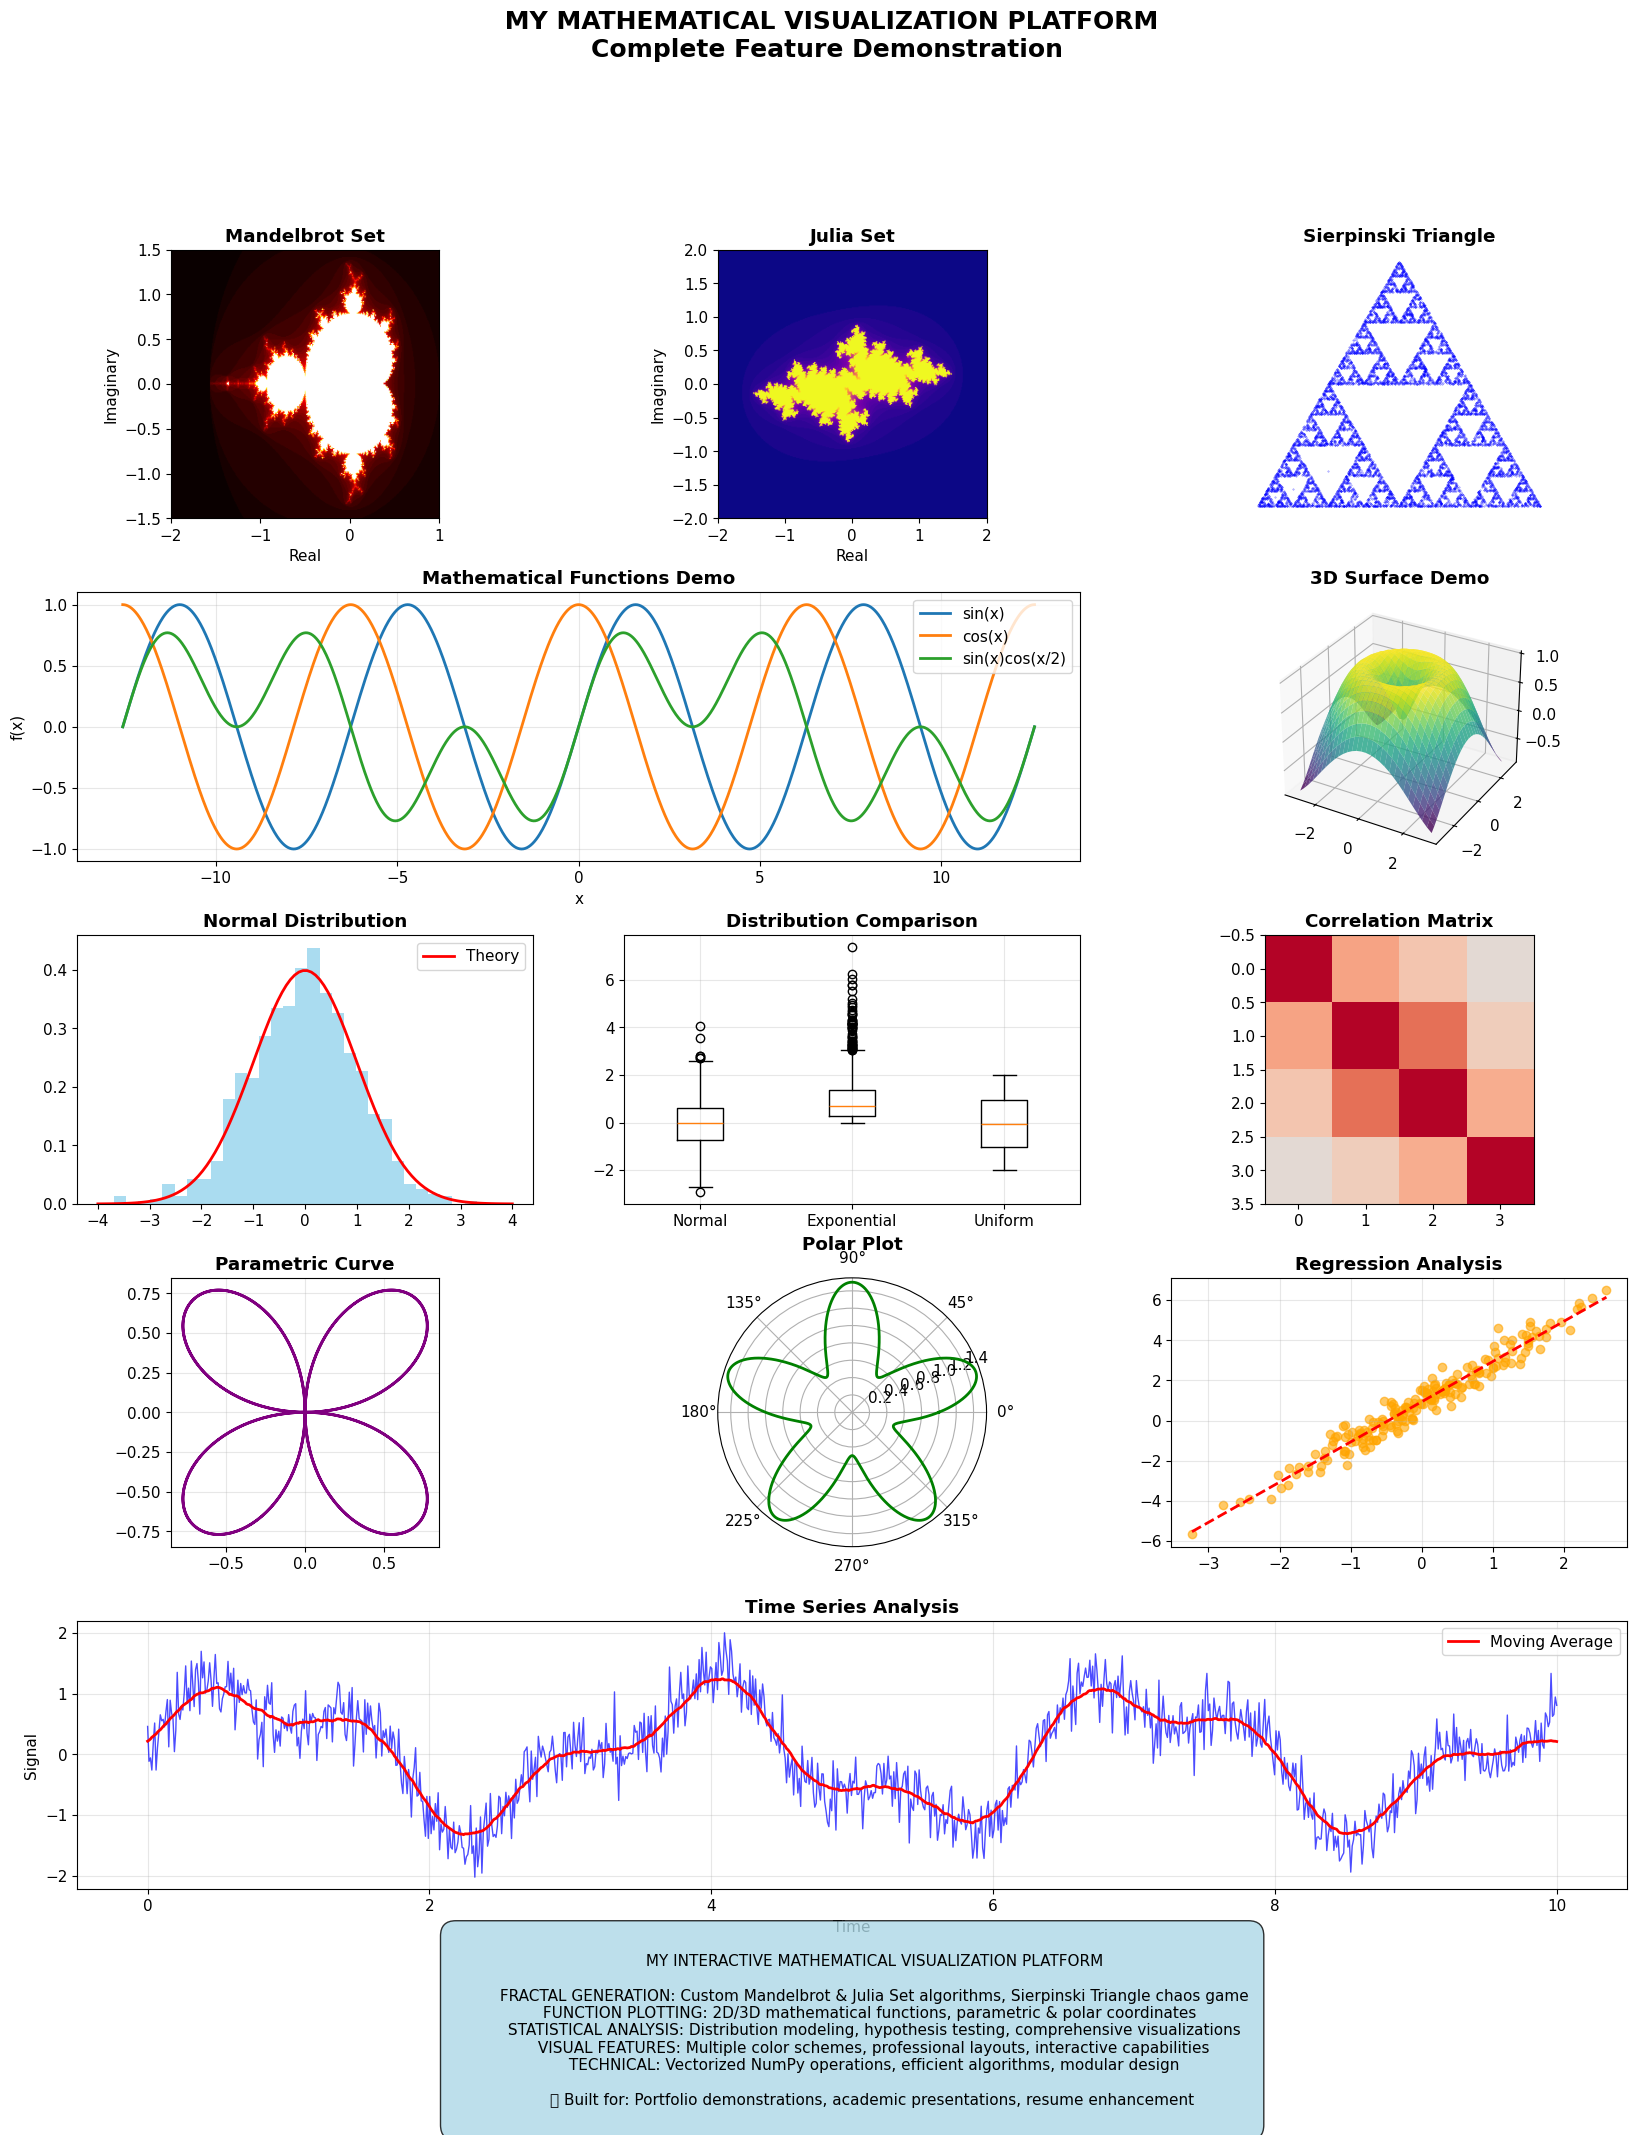

 Demo complete! This is what I built 

 My platform is ready!
Try these awesome features I built:
• my_platform.create_mandelbrot() - Beautiful fractals
• my_platform.plot_math_function('sin(x)*cos(x)') - Function plotting
• my_platform.analyze_statistics('normal', 0, 1, 10000) - Stats analysis


In [8]:
# Creating my platform instance
my_platform = MathVisualizationPlatform()

# Let's create the full demo - this is what I show people!
my_platform.create_full_demo()

print("\n My platform is ready!")
print("Try these awesome features I built:")
print("• my_platform.create_mandelbrot() - Beautiful fractals")
print("• my_platform.plot_math_function('sin(x)*cos(x)') - Function plotting")
print("• my_platform.analyze_statistics('normal', 0, 1, 10000) - Stats analysis")


 Creating Mandelbrot fractal - 1000x800 resolution
Using 200 iterations for detail


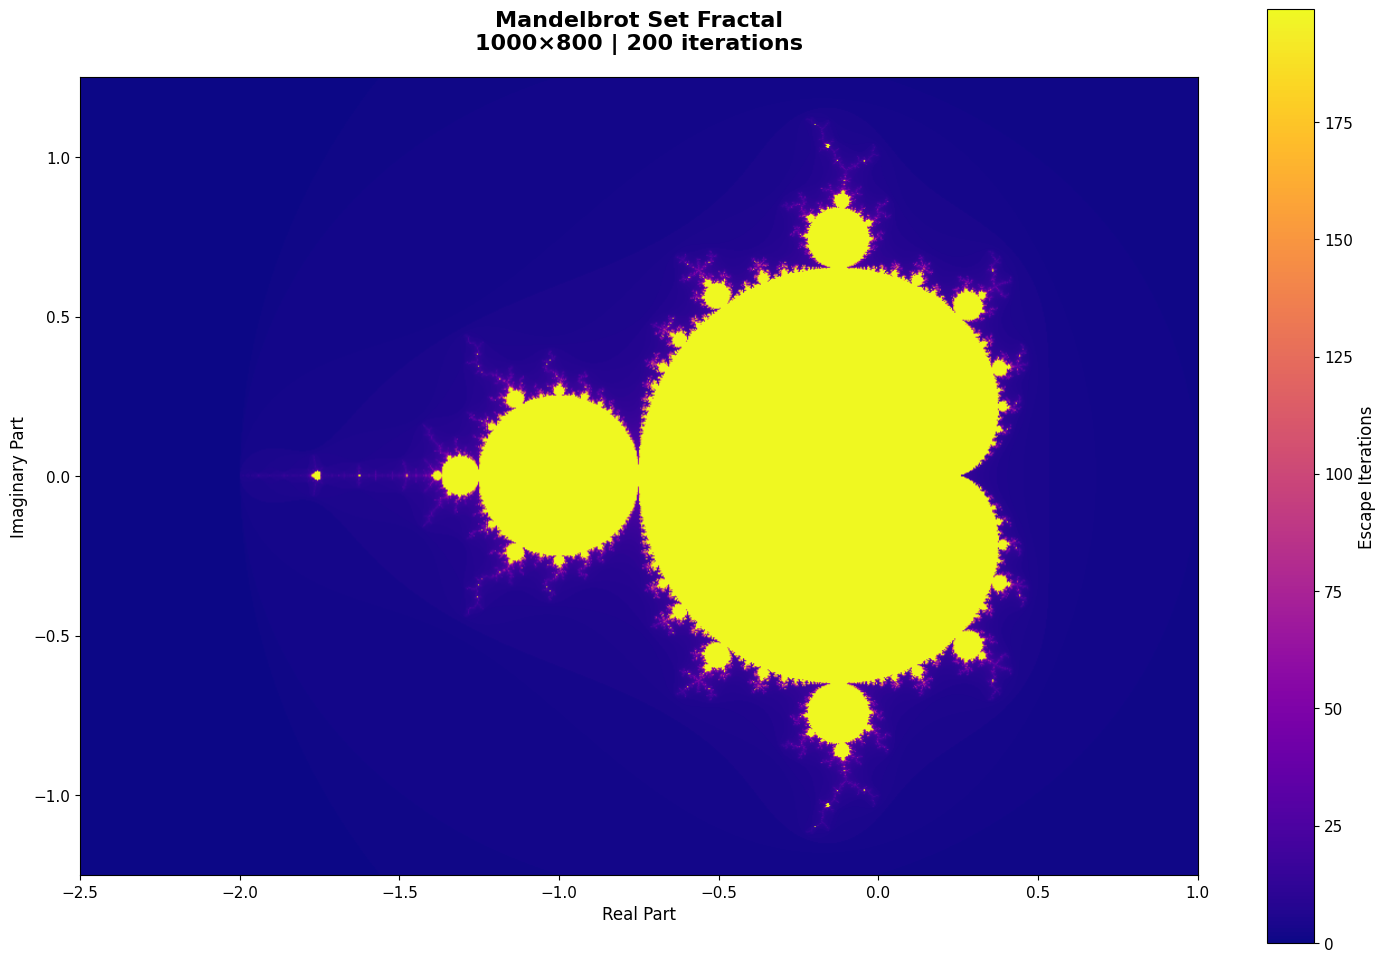

 Fractal complete! Looks amazing right?
 Plotting function: f(x) = sin(x) * exp(-x/10)


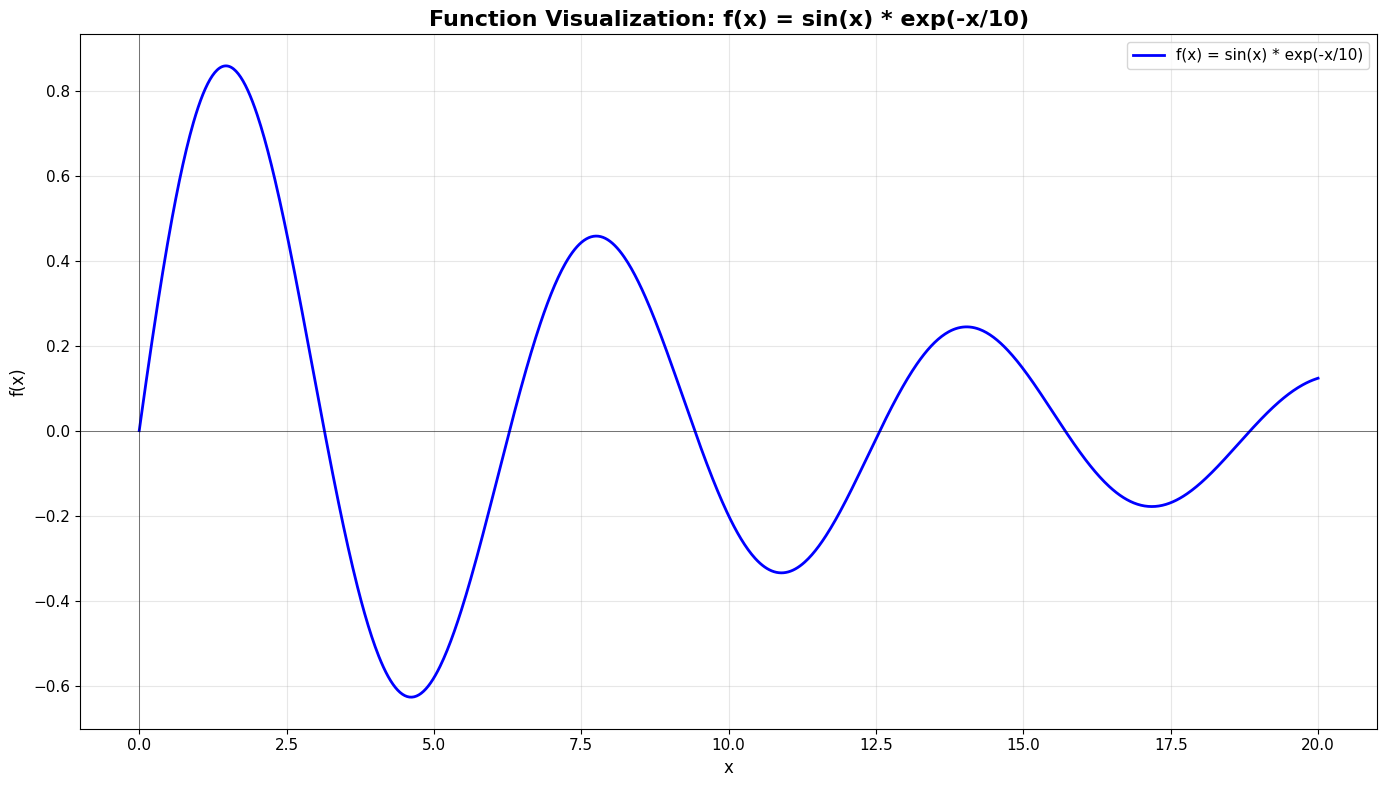

 Function plotted successfully!
 Creating 3D surface: f(x,y) = sin(sqrt(x**2 + y**2))


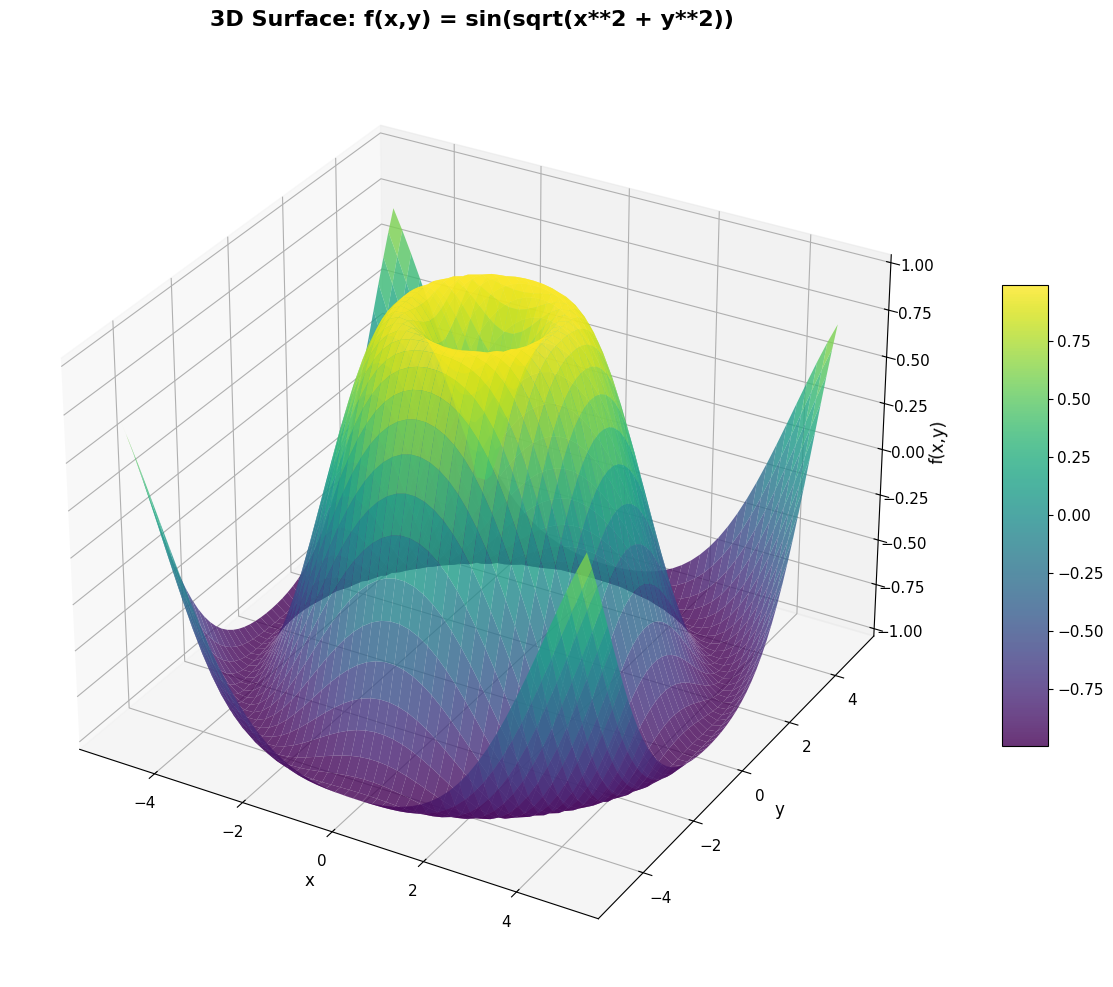

 3D surface created! Looks incredible!
 Statistical Analysis: Gamma Distribution
Parameters: 2, 1.5 | Sample Size: 15,000


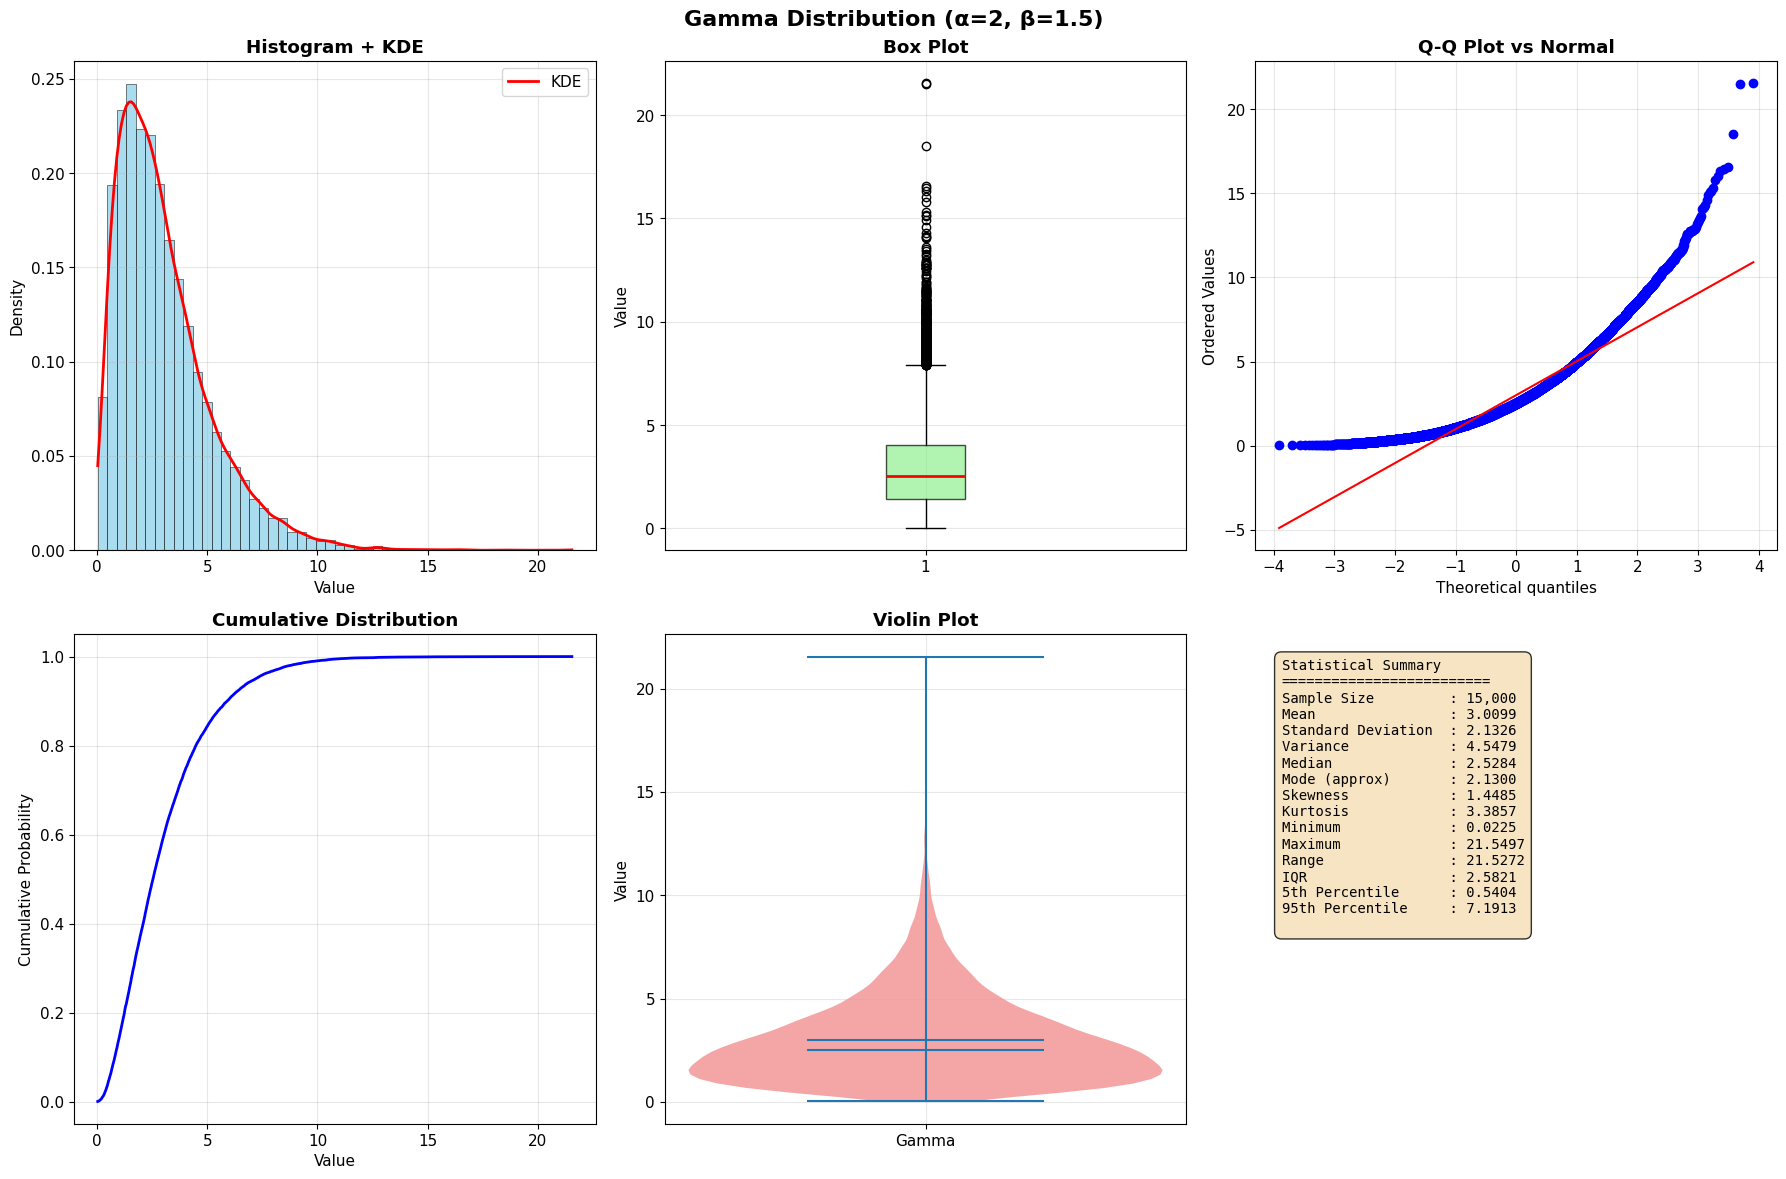


HYPOTHESIS TESTING RESULTS

 TESTING FOR NORMALITY:
------------------------------

Kolmogorov-Smirnov Test:
  Test Statistic: 0.096170
  P-value: 3.361244e-121
  Conclusion: Does not follow normal distribution

Anderson-Darling Test:
  Test Statistic: 352.440722
  Critical Values: [0.576 0.656 0.787 0.918 1.092]
  Significance Levels: [15.  10.   5.   2.5  1. ]%

 ONE-SAMPLE TESTS:
------------------------------
One-Sample T-Test (testing if μ = 3.009907040452871):
  T-statistic: 0.000000
  P-value: 1.000000e+00
  Decision: Fail to reject H₀ (α=0.05)

This platform showcases my mathematical programming skills beautifully!


In [9]:
# Let me test my fractal generator - this always impresses people
my_platform.create_mandelbrot(width=1000, height=800, iterations=200, color_scheme='plasma')

# Testing my function plotter with a cool equation
my_platform.plot_math_function('sin(x) * exp(-x/10)', x_min=0, x_max=20, plot_style='line')

# 3D visualization
my_platform.plot_3d_surface('sin(sqrt(x**2 + y**2))', x_min=-5, x_max=5, y_min=-5, y_max=5)

# Statistical analysis
data, stats = my_platform.analyze_statistics('gamma', param_1=2, param_2=1.5, sample_count=15000)


print("This platform showcases my mathematical programming skills beautifully!")
